# **Analyse et mod√©lisation de s√©ries temporelles**

## **1. Notions de bases**

### **1.1. D√©finition**

Une s√©rie temporelle (ou chronologique), est une suite de valeurs num√©riques repr√©sentant l‚Äô√©volution d‚Äôune quantit√© au cours du temps. On la note g√©n√©ralement $\{y_t\}_{t=1}^{T}$.  
NB: on parle parfois de processus ou processus stochastique qui fait r√©f√©rence au processus, **inconnu et non observable**, qui a entra√Æn√© ces observations.

### **1.2. Les composantes d'une s√©rie temporelle**

Une s√©rie temporelle peut se d√©composer en 4 composantes :
- **Tendance** : orientation g√©n√©rale de la s√©rie (vers le haut ou vers le bas)
- **Saisonnalit√©** : tendances hebdomadaires, mensuelles, trismestrielles ou annuelles
- **Cycle** : cycles √©conomiques √† long terme, sur plusieurs ann√©es
- **Bruit** : ce qui reste apr√®s avoir extrait les composants pr√©c√©dents

On verra plus loin comment d√©composer une s√©rie temporelle.

### **1.3. La stationnarit√©**

![stationnarite](img/stationnarite.png)

Un processus $\{y_t\}_{t=1}^{T}$ est dit stationnaire lorsque : 
- $E(y_t) = \mu$
- $V(y_t) = \sigma^2$
- $\gamma(t,s) = \gamma(t-s)$ o√π $\gamma$ est la fonction d'autocorr√©lation qu'on va d√©couvrir de suite

### **1.4. L'autocorr√©lation et l'autocorr√©lation partielle**

L'autocorr√©lation est la covariance entre deux valeurs d'une m√™me s√©rie :
$$\gamma(t,s) = Cov(y_t,y_s) = E[(y_t-\mu_t)(y_s-\mu_s)]$$
Cet indicateur montre comment les observations d'une s√©rie temporelle sont li√©es entre elles.

La **fonction d'autocorr√©lation (ACF)** et la **fonction d'autocorr√©lation partielle (PACF)** permettent de mesurer l'association entre des valeurs actuelles et pass√©es. Elles indiquent les valeurs pass√©es les plus corr√©l√©es aux valeurs suivantes et donc les plus utiles √† la pr√©vision de valeurs futures. Pour parler _"avec les mains"_, la fonction ACF mesure la similitude entre 2 observations en fonction du d√©calage temporel entre les 2.

Concr√®tement :
- ACF au d√©calage k = corr√©lation entre les valeurs s√©par√©es par k intervalles
- PACF au d√©calage k = corr√©lation entre les valeurs s√©par√©es par k intervalles, compte tenu des valeurs des intervalles interm√©diaires

![acfpacf](img/acf_pacf.png)

Ces graphiques interviennent dans la d√©termination de l'ordre des processus d'un mod√®le ARIMA qu'on va voir bient√¥t car je suis s√ªr que vous avez h√¢√¢√¢√¢√¢√¢te.

### **1.5. Bruit blanc**

Un **bruit blanc** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui v√©rifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $E[\epsilon_t\epsilon_s] = 0$ pour $s \neq t$

Un **bruit blanc ind√©pendant** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui v√©rifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $\epsilon_t$ et $\epsilon_s$ ind√©pendants pour $s \neq t$

Un **bruit blanc gaussien** $\{\epsilon_t\}_{t=1}^{T}$ est un bruit blanc ind√©pendant qui suit une loi normale centr√©e : $\epsilon_t \hookrightarrow \mathcal{N}(0,\sigma^2)$

Intuitivement, un bruit blanc dans le cadre des s√©ries temporelles, c'est la partie purement al√©atoire du processus.

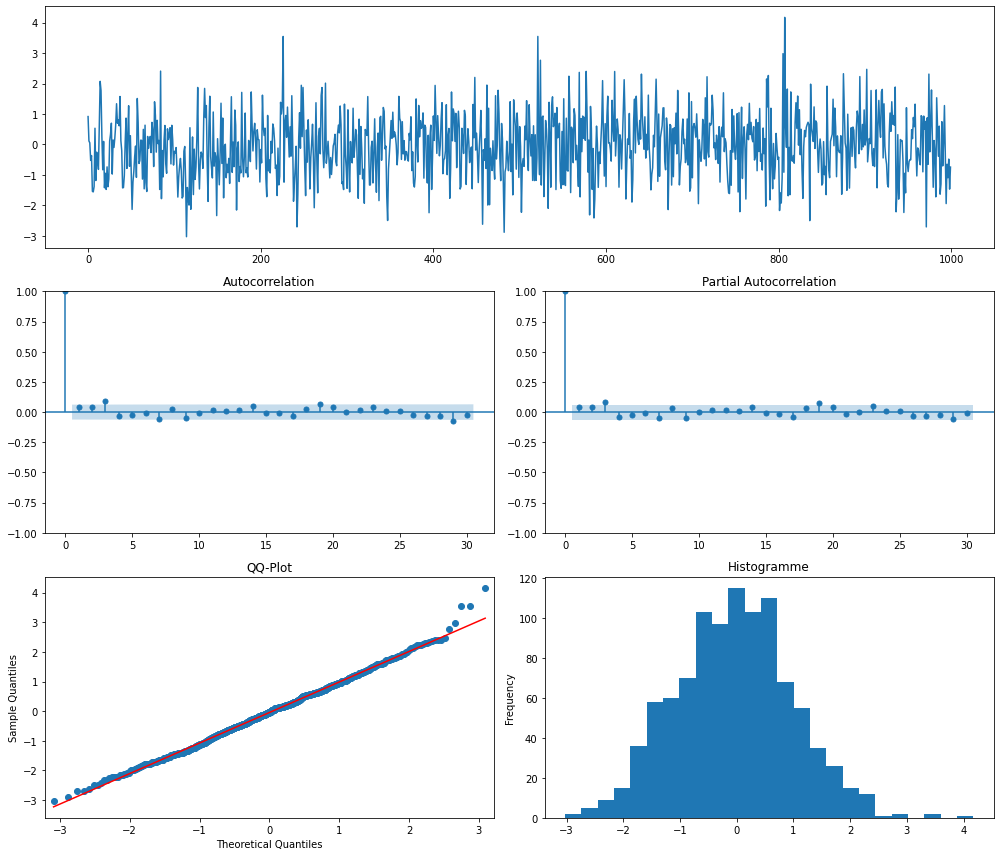

In [1]:
import numpy as np
 
# on g√©n√®re un bruit blanc gaussien
e = np.random.normal(size=1000)

# on visualise la s√©rie avec la fonction d√©finie dans le script fonctions.py
import fonctions as fct
fct.ts_plot(e)

**Interpr√©tation :** les graphiques ci-dessus ressemblent √† la structure souhait√©e d'une s√©rie chronologique d'erreurs :
- pas de pics dans les graphes ACF et PACF 
- le QQ-plot et l'histogramme indiquent un comportement normal

### **1.6. La marche al√©atoire**

Un processus de marche al√©atoire $\{x_t\}_{t=1}^{T}$ est une s√©rie qui v√©rifie :  
$x_t = x_{t-1} + \epsilon_t$ avec $\epsilon_t$ un bruit blanc

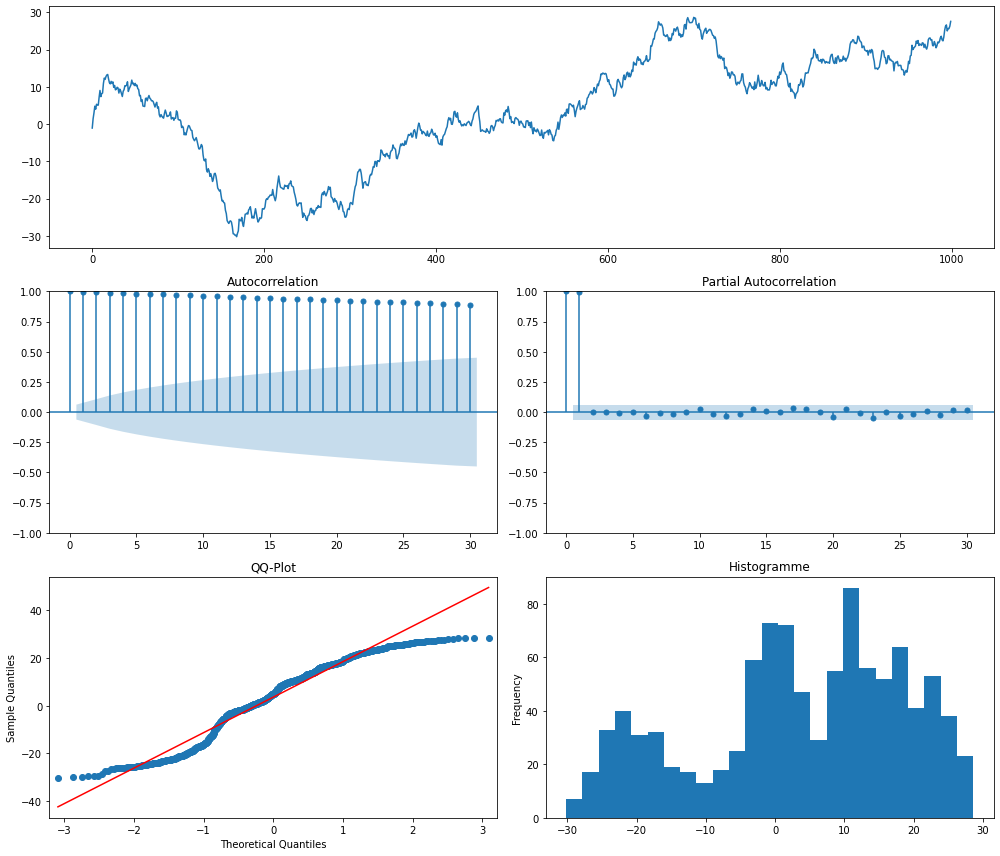

In [2]:
#param√®tres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
 
#simulation d'une marche al√©atoire
for t in range(T):
    x[t] = x[t-1] + e[t]
    
#visualisation
fct.ts_plot(x)

**Interpr√©tation :** on voit la ressemblance entre ce processus de marche al√©atoire et les cours d'actifs en bourse qui sont caract√©ris√©s par : 
- un ACF √©lev√© pour toute longueur de d√©calage et un PACF √©lev√© pour le premier d√©calage uniquement 
- un QQ-plot et un histogramme indiquant que la s√©rie n'est pas un bruit blanc

### **1.7. Mod√®le autor√©gressif**

Une s√©rie temporelle $\{x_t\}_{t=1}^{T}$ qui suit un mod√®le autor√©gressif d'ordre $p$ (et not√© $AR(p)$) est telle que :  
$x_t = \mu + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \epsilon_t$ avec $\mu$ une constante et $\epsilon_t$ un bruit blanc

Un processus autor√©gressif d'ordre 1 est donc donn√© par :
$AR(1)$ : $x_t = \mu + \phi x_{t-1} + \epsilon_t$ 

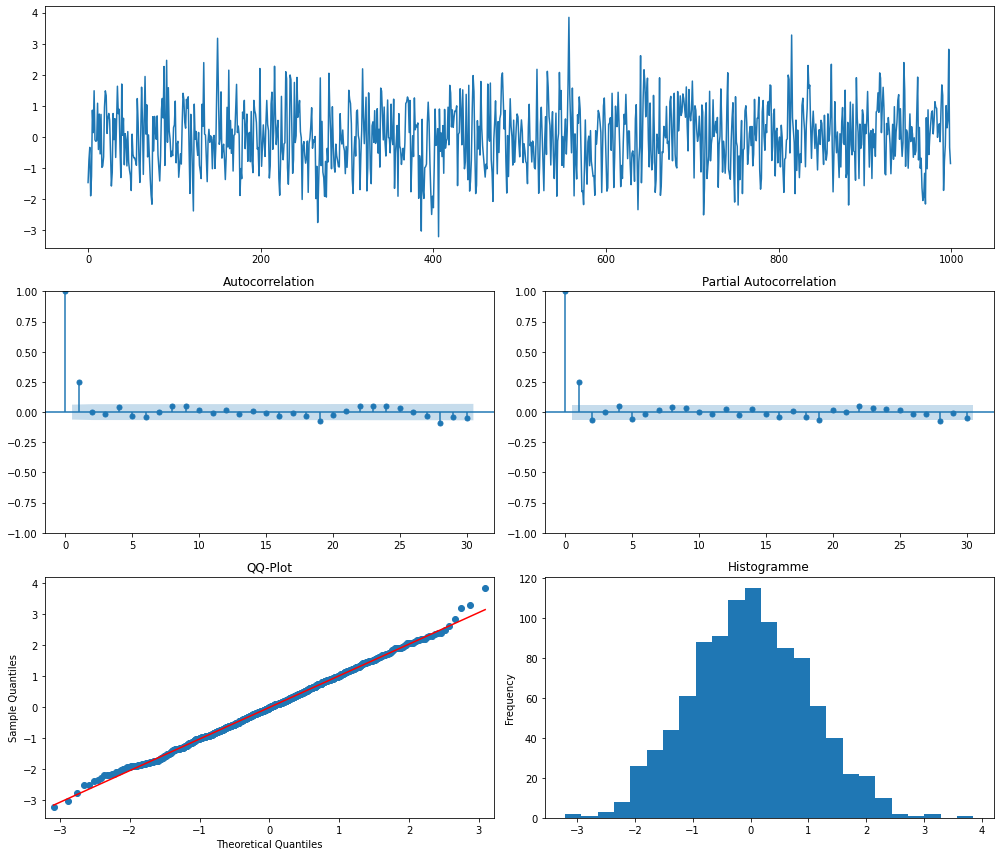

In [3]:
#param√®tres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.3
 
#simulation d'un processus AR(1)
for t in range(T):
    x[t] = phi * x[t-1] + e[t]
    
#visualisation
fct.ts_plot(x)

**Interpr√©tation :**
- pour un processus AR(1) avec $\phi=0.3$,on voit sur les graphiques ACF et PACF, un pic au premier d√©calage qui tend de suite vers 0
- l'histogramme et le QQ-plot indiquent des r√©sidus presque al√©atoires.

*Remarque pas anodine* : la marche al√©atoire introduite pr√©c√©demment est un processus AR(1), et il n'est pas stationnaire. Par contre, la s√©rie diff√©renci√©e $(x_t - x_{t-1})$ est stationnaire. La stationnarit√© d'un processus $AR(1)$ d√©pend de si $|\phi|<1$. On peut g√©n√©raliser cette propri√©t√© aux processus $AR(p)$.

### **1.8. Mod√®le moyenne mobile**

Le mod√®le de moyenne mobile d'ordre $q$ not√© $MA(q)$ suppose que la s√©rie temporelle observ√©e peut √™tre repr√©sent√©e par une combinaison lin√©aire de termes d'erreur de bruit blanc. Cela s'√©crit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

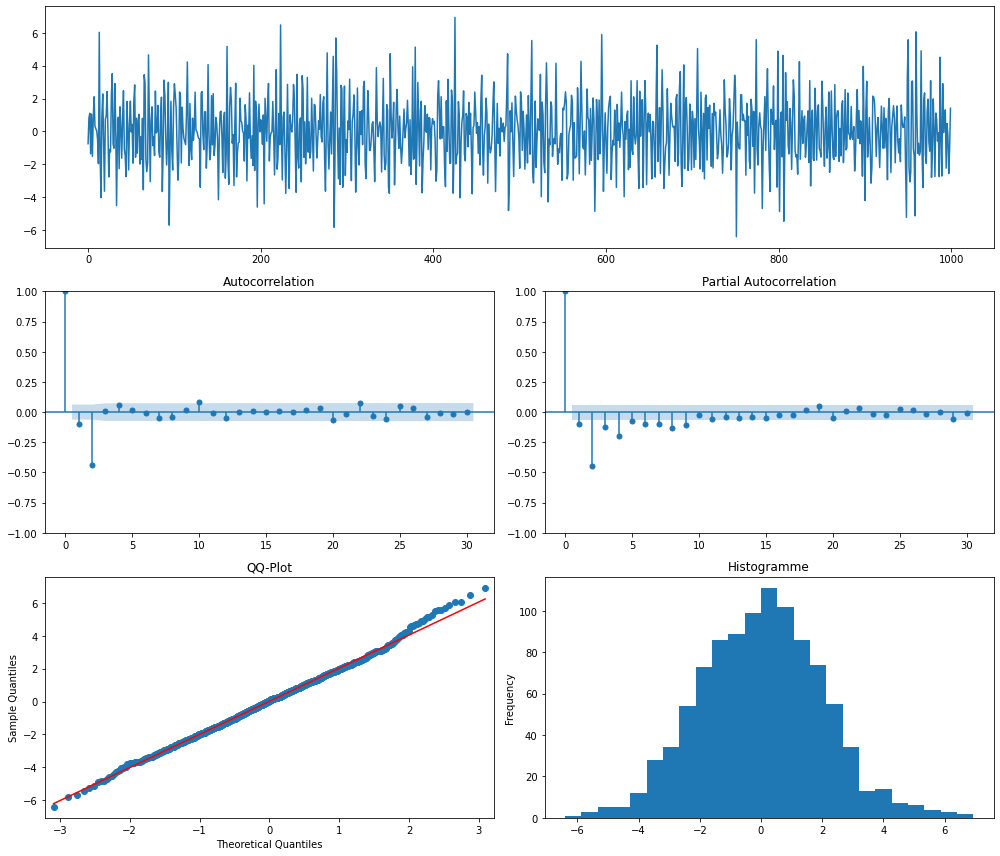

In [4]:
#param√®tres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
theta1 = 0.8
theta2 = -1.4
 
# simulation d'un mod√®le MA(2)
for t in range(T):
    x[t] = e[t] + theta1 * e[t-1] + theta2 * e[t-2]

#visualisation
fct.ts_plot(x)

**Interpr√©tation :** pour le processus $MA(2)$ avec les param√®tres choisis, on voit un pic plus important pour le deuxi√®me d√©calage dans les trac√©s ACF et PACF. 
On peut observer √©galement que le pic dans le graphique PACF ne d√©cro√Æt pas imm√©diatement mais prend quelques p√©riodes pour se "d√©sint√©grer".

*Remarque toujours pas anodine* : un processus $MA(q)$ est toujours stationnaire.

### **1.9. Mod√®le autor√©gressif et moyenne mobile**

ùúñùë°+Œ£ùëùùëñ=1ùúôùëñùë•ùë°‚àíùëñ+Œ£ùëûùëñ=1ùúÉùëñùúñùë°‚àíùëñ aUn processus $ARMA(p,q)$ est une combinaison des deux mod√®les pr√©c√©dents et s'√©crit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

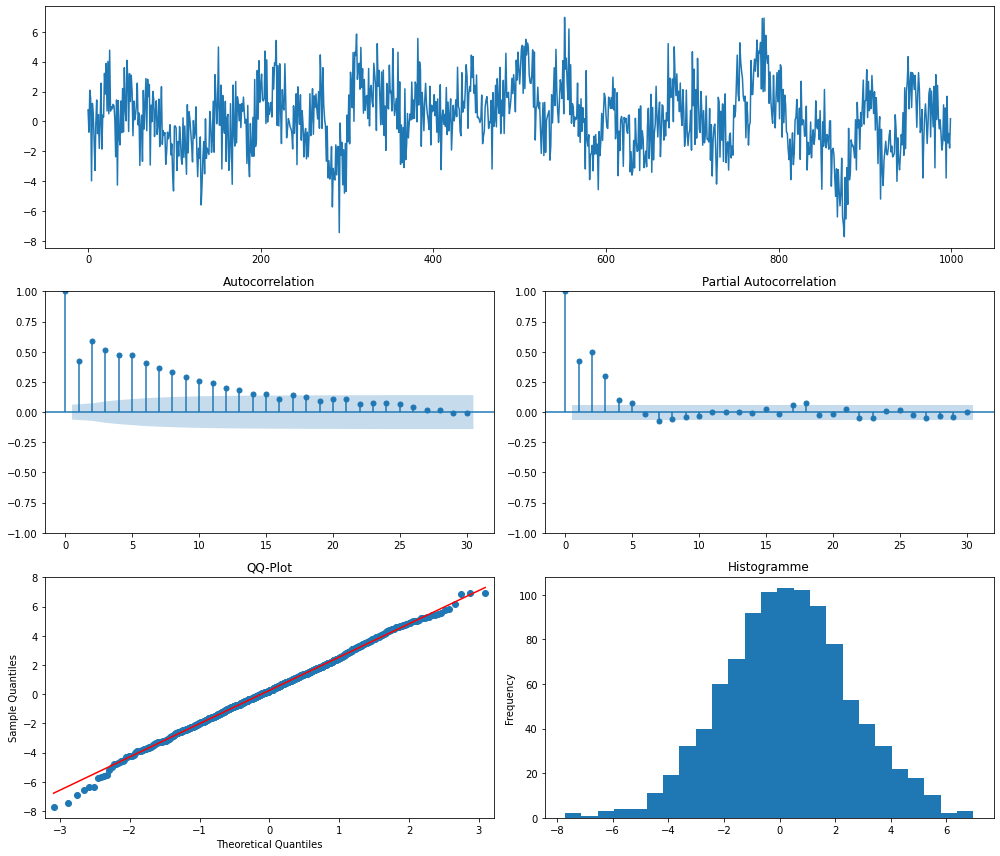

In [5]:
#param√®tres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi1 = 0.3
phi2 = 0.6
theta1 = 0.8
theta2 = -1.1
theta3 = 0.5

# simulation d'un mod√®le ARMA(2,3)
for t in range(T):
    x[t] = e[t] + phi1 * x[t-1] + phi2 * x[t-2] + theta1 * e[t-1] + theta2 * e[t-2] + theta3 * e[t-3]

#visualisation
fct.ts_plot(x)

**Interpr√©tation :** on voit clairement que la s√©rie n'est pas stationnaire et donc on n'ira pas beaucoup plus loin pour l'interpr√©tation...

## **2. Des exemples de s√©ries temporelles**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Importer, afficher et commenter les s√©ries temporelles :
- "sunspot" : nombre annuel de t√¢ches solaires de 1790 √† 1970
- "uspop" : population des Etats-Unis, en millions, de 1790 √† 1990 (fr√©quence d√©cennal)
- "beer" : production mensuelle de bi√®re en Australie, en m√©galitres, de janvier 1956 √† aout 1995
- "lynx" : nombre annuel de lynx captur√©s au Canada, de 1821 √† 1934

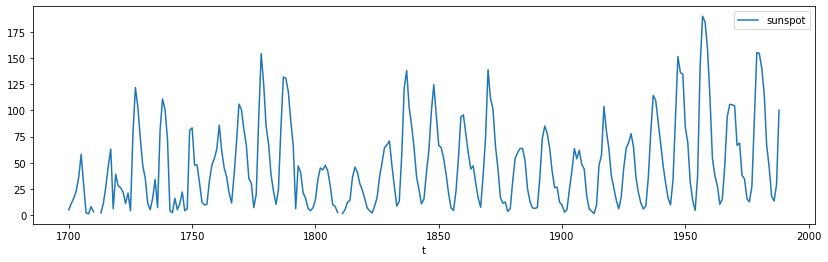

In [7]:
sunspot = pd.read_csv("data/sunspot.csv", index_col="t")
sunspot.plot(y="sunspot", figsize=(14,4));
#fct.ts_plot(sunspot["sunspot"])

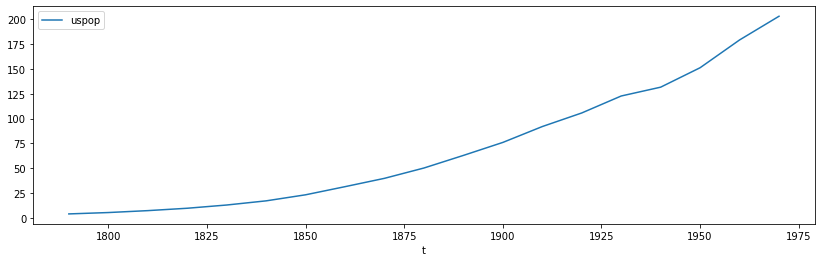

In [8]:
uspop = pd.read_csv("data/uspop.csv", index_col="t")
uspop.plot(y="uspop", figsize=(14,4));
#fct.ts_plot(uspop["uspop"])

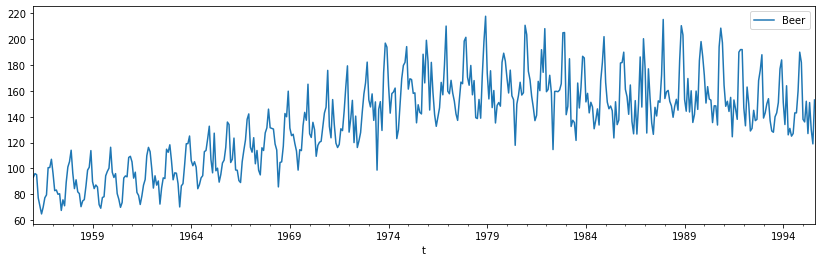

In [9]:
beer = pd.read_csv("data/beer.csv", header=None, names=["t", "Beer"], parse_dates=True, dayfirst=True, index_col="t")
beer.plot(y="Beer", figsize=(14,4));
#fct.ts_plot(beer["Beer"])

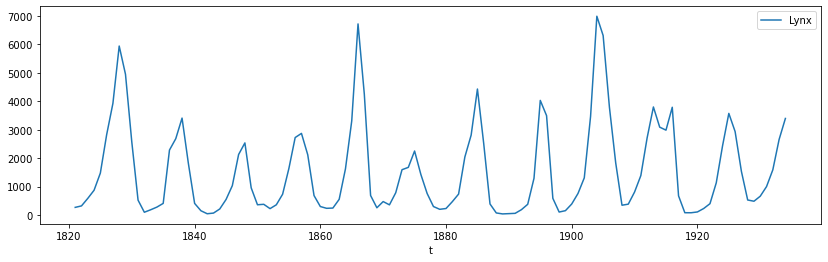

In [10]:
lynx = pd.read_csv("data/lynx.csv", index_col="t")
lynx.plot(y="Lynx", figsize=(14,4));
#fct.ts_plot(beer["Beer"])

## **3. D√©composition d'une s√©rie temporelle**

Le principe de la d√©composition des s√©ries temporelles est de d√©couper les s√©ries originales en plusieurs composants ind√©pendants (qu'on a vus plus haut) : tendance, saisonnalit√©, cycle et bruit.

Pour illustrer tout √ßa, on va utiliser des donn√©es qui sont aux s√©ries temporelles ce que le dataset "Titanic" est au machine learning, la base : la s√©rie AirPassenger qui mesure le nombre mensuel de passagers a√©riens, en milliers, de janvier 1949 √† d√©cembre 1960.

Dans la suite, on va noter $X_{t}$  la s√©rie AirPassengers et $Y_t=ln(X_t)$. 

**Exo :** pour commencer, charger le dataset et afficher simplement la s√©rie (sans utiliser la fonction `ts_plot`) puis afficher aussi la s√©rie logarithmique. Commenter les r√©sultats.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fonctions as fct

plt.rcParams['figure.figsize'] = (16,7)

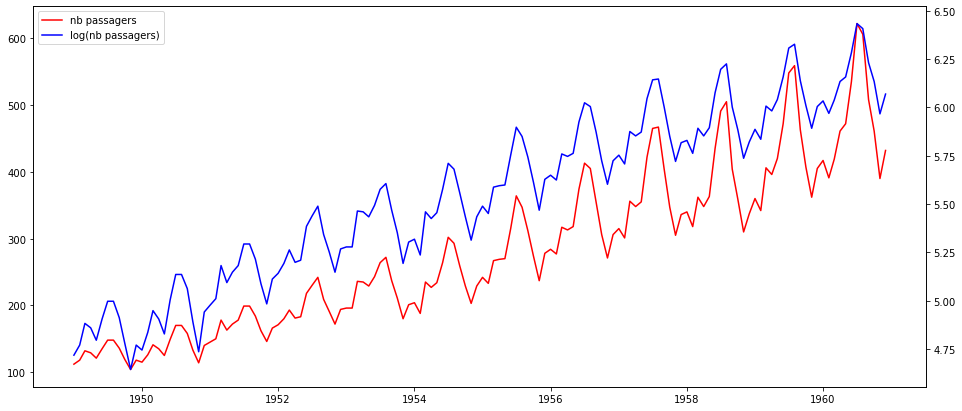

In [12]:
x = pd.read_csv('data/AirPassengers.csv', index_col=0, parse_dates=True)
y = np.log(x)

fig, ax = plt.subplots()
ln1 = ax.plot(x, c='r', label="nb passagers")

ax2 = ax.twinx()
ln2 = ax2.plot(y, c='b', label="log(nb passagers)")

# ajout de la l√©gende
lns = ln1 + ln2
labels=[l.get_label() for l in lns]
ax.legend(lns, labels);

On voit un accroissement de l'amplitude des pics (c'est-√†-dire de la variance) pour la s√©rie $X$ qui dispara√Æt avec la transformation logarithmique.  
$log(ab) = log(a) + log(b)$ donc le $log$ a la propri√©t√© de tranformer un mod√®le **multiplicatif** en un mod√®le **additif**.

### **3.1. La tendance**

On l'a vu un dans le notebook d'intro, une fa√ßon d'identifier la tendance consiste √† lisser la courbe en utilisant des moyennes mobiles sur une fen√™tre glissante d'observations.

**Exo :** faire une figure avec plusieurs graphiques, chacun repr√©sentant 2 s√©ries : la s√©rie originale et la s√©rie des moyennes mobiles pour diff√©rentes longueur de fen√™tres glissantes. Commenter les r√©sultats

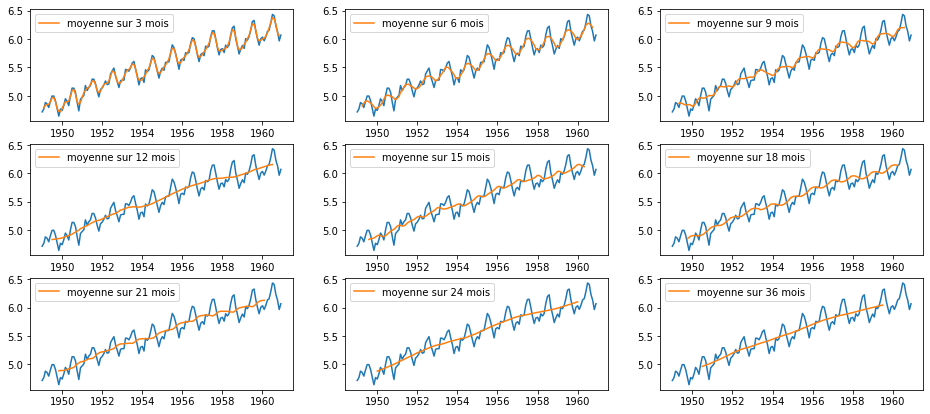

In [13]:
win = [3, 6, 9, 12, 15, 18, 21, 24, 36]
fig = plt.figure()

for i in range(len(win)):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(y)
    ax.plot(y.rolling(win[i], center=True).mean(), label=f"moyenne sur {win[i]} mois")
    ax.legend()

### **3.2. Saisonnalit√©**

Une mani√®re de v√©rifier l'effet saisonnier est de tracer une courbe pour chaque ann√©e en prenant les mois comme abscisses et visualiser ainsi la r√©partition des passagers au cours de chaque ann√©e. Just do it.

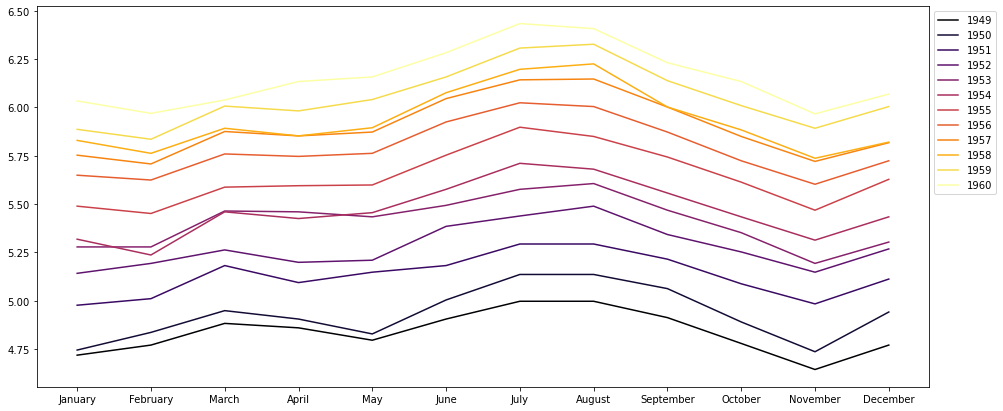

In [14]:
plt.figure()

yrs = [str(yr) for yr in y.index.year.unique()]
mths = y.index.month_name().unique()
colors = plt.cm.inferno(np.linspace(0,1,len(yrs)))

for i in range(len(yrs)):
    plt.plot(mths, y.loc[yrs[i]], label=yrs[i], color=colors[i])
    plt.legend(bbox_to_anchor=(1,1))

### **3.3. Bruit**

**Exo :** utiliser la fonction `seasonal_decompose` qui renvoie la s√©rie temporelle d'origine, la tendance, la saisonnalit√© et les r√©sidus

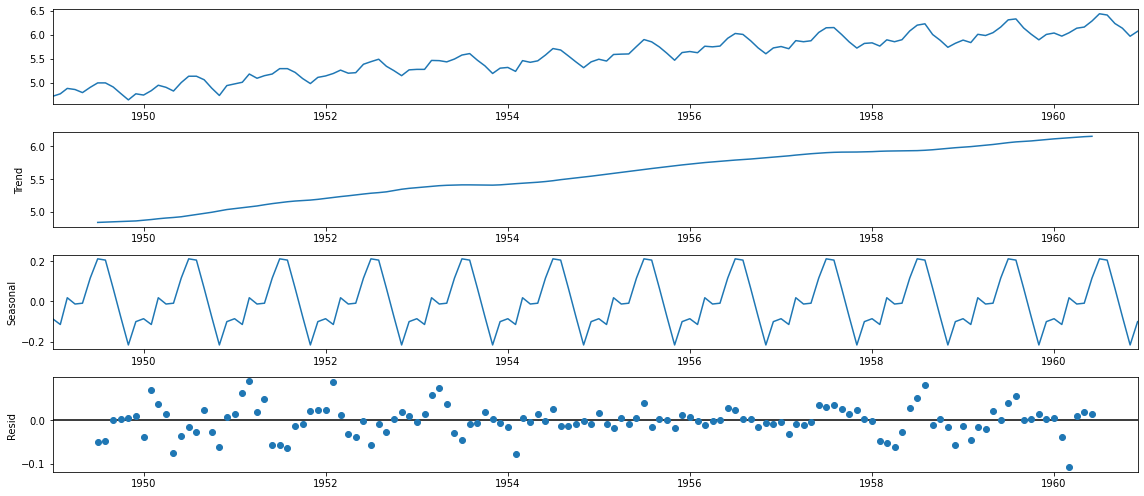

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
decomp = seasonal_decompose(y, model='additive')
decomp.plot();

## **4. Pr√©vision avec un lissage exponentiel**

Le lisage exponentiel est une technique de lissage qui ressemble un peu aux moyennes mobiles et peut √™tre utilis√©e pour pr√©dire une s√©rie temporelle. C'est en fait un cas particulier des mod√®les ARMA d√©j√† √©voqu√©s. On en distingue diff√©rents types (simple, double, triple...). On notera que les lissages exponentiels simple et double ne sont plus vraiment d'actualit√©. En revanche le lissage exponentiel triple, lui, est parfois utilis√©.

Pour un lissage exponentiel simple (qui ne sera pas efficace ici puiqu'il s'applique sur une s√©rie sans saisonnalit√© et √† tendance localement constante), on peut faire :

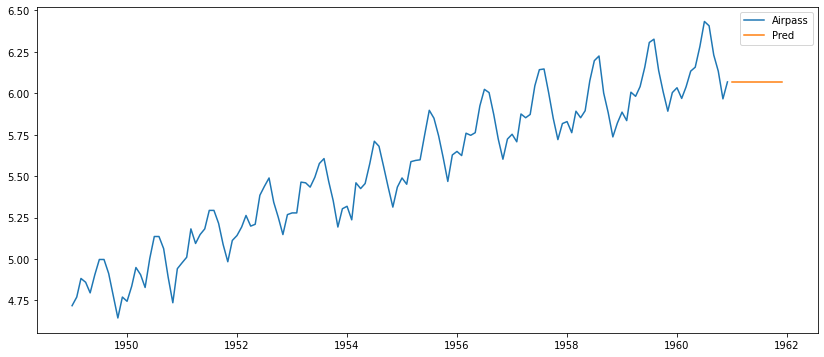

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing

les = ExponentialSmoothing(y.values, trend=None, seasonal=None).fit()
les_pred = les.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y, label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), les_pred, label='Pred')
plt.legend()
plt.show()

Pour le lissage exponentiel double (adapt√© pour des s√©ries √† tendance localement lin√©aire) :

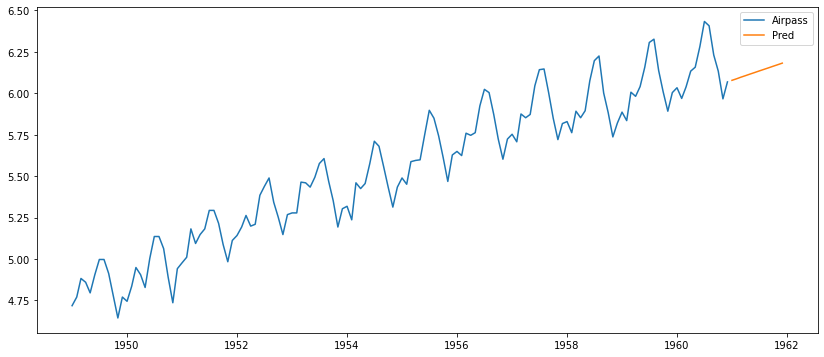

In [17]:
led = ExponentialSmoothing(y.values, trend='add', seasonal=None).fit()
led_pred = led.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y, label='Airpass')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), led_pred, label='Pred')
plt.legend()
plt.show()

Pour le lissage exponentiel triple ou m√©thode de Holt-Winters (prise en compte en plus d'une composante saisonni√®re) :

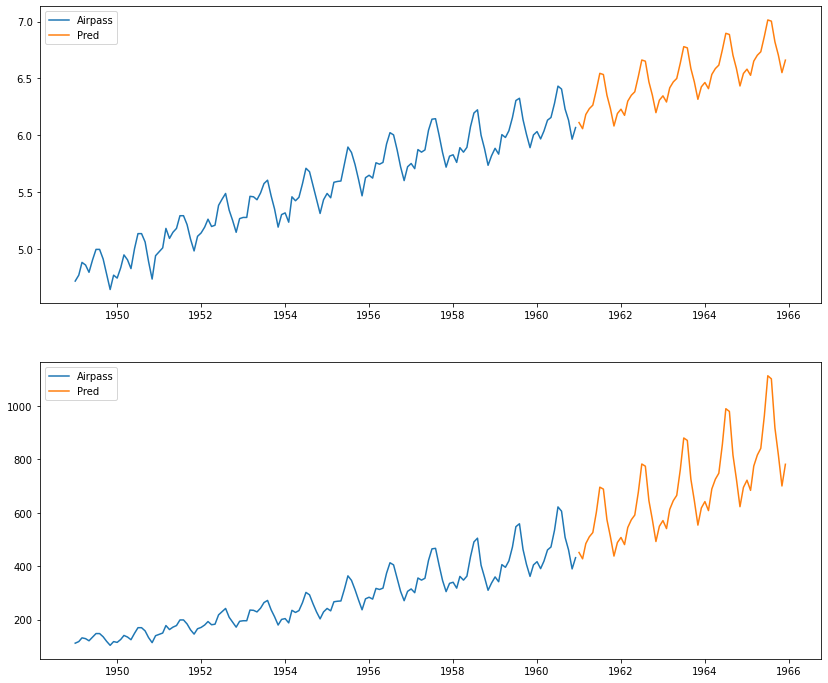

In [18]:
let = ExponentialSmoothing(y.values, seasonal_periods=12, trend='add', seasonal='add').fit()
y_pred = let.forecast(60)
x_pred = np.exp(let.forecast(60))


fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,12))

ax1.plot(y, label='Airpass')
ax1.plot(pd.date_range(y.index[len(y)-1], periods=60, freq='M'), y_pred, label='Pred')
ax1.legend()

ax2.plot(x, label='Airpass')
ax2.plot(pd.date_range(y.index[len(y)-1], periods=60, freq='M'), x_pred, label='Pred')
ax2.legend()

plt.show()

## **5. Pr√©vision √† l'aide d'un mod√®le ARIMA**

Un mod√®le autor√©fressif int√©gr√© √† moyennes mobiles (ARIMA) est une g√©n√©ralisation du mod√®le ARMA, aper√ßu plus haut. 

Les mod√®les ARIMA sont appliqu√©s dans certains cas o√π les donn√©es montrent une non-stationnarit√©, o√π une √©tape de diff√©renciation initiale (correspondant √† la partie "int√©gr√©e" du mod√®le) peut √™tre appliqu√©e une ou plusieurs fois pour √©liminer la non-stationnarit√©.

Dans le mod√®le de base, trois param√®tres $(p,d,q)$ sont utilis√©s pour param√©trer les mod√®les ARIMA. Par cons√©quent, un mod√®le ARIMA est not√© $ARIMA(p,d,q)$ et est d√©fini par :
$$
\left(1 - \sum_{i=1}^p \phi_i L^i \right) (1 - L)^d y_t = \mu + \left(1 + \sum_{i=1}^q \theta_i L^i \right) \varepsilon_t
$$

Une g√©n√©ralisation est le mod√®le SARIMA, ou ARIMA saisonnier, qui permet de tenir compte en plus de la saisonnalit√©. Ce mod√®le est caract√©ris√© non plus par 3 param√®tres $(p,d,q)$ mais par 7 ! Le mod√®le SARIMA not√© $SARIMA(p,d,q)(P,D,Q)_s$ o√π :
- $s$ est la p√©riode de la saisonnalit√©
- $(P,D,Q)$ sont les ordres de la partie saisonni√®re

On va essayer de pas trop rentrer dans les d√©tails th√©oriques mais de voir par la pratique.

### **5.1. Stationnarisation de la s√©rie**

Les s√©ries ont g√©n√©ralement une tendance et une saisonnalit√©. Pour pouvoir les mod√©liser par des processus stationnaires comme les ARMA, il faut les stationnariser. On va voir en pratique comment faire.

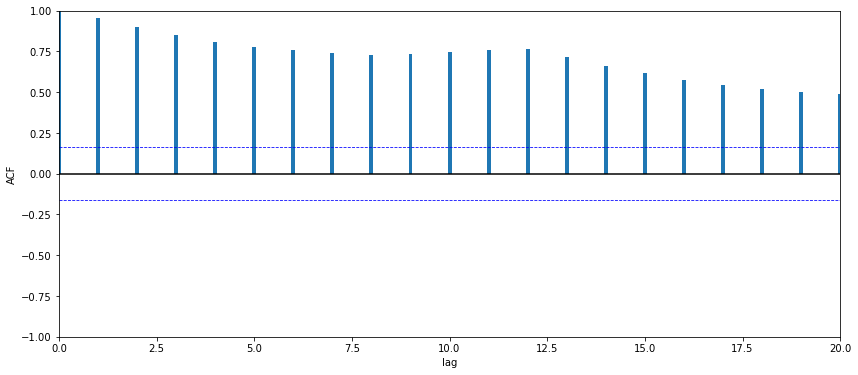

In [20]:
fct.plot_acf_pacf(y)

La sortie ACF pr√©sente une d√©croissance lente vers 0, ce qui traduit un probl√®me de non-stationnarit√©. On effectue donc une diff√©renciation $(1-L)$ c'est-√†-dire qu'on va regarder la s√©rie $Y_t-Y_{t-1}$.

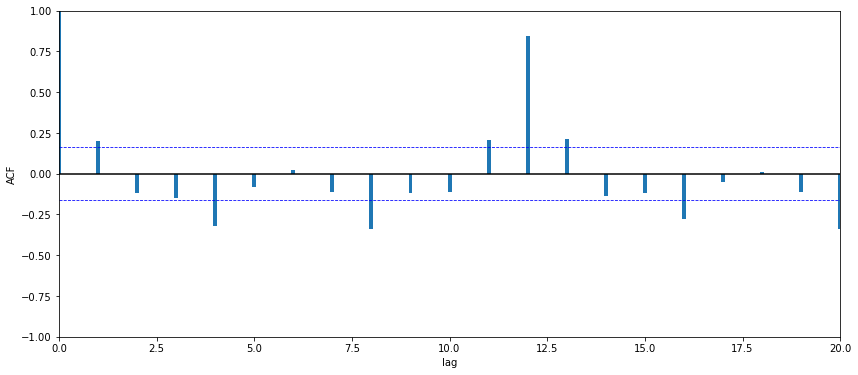

In [21]:
y_diff_1 = y - y.shift(1)
fct.plot_acf_pacf(y_diff_1[1:])

Toujours une d√©croissance lente vers 0 de la s√©rie diff√©renci√©e d'ordre 1 **pour les multiples de 12**. Cela correspond √† la saisonnalit√© et on va donc diff√©rencier √† nouveau en appliquant cette fois $(1-L^{12})$ .

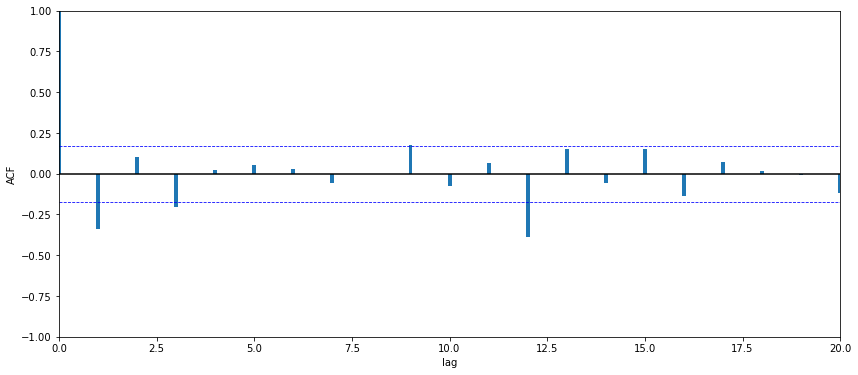

In [22]:
y_diff_1_12 = y_diff_1 - y_diff_1.shift(12)
fct.plot_acf_pacf(y_diff_1_12[13:])

Avec cette double diff√©renciation, on s'approche d'un autocorr√©logramme simple empirique. On va donc mod√©liser la s√©rie $(1-L)(1-L^{12})ln(X_t)$ par un mod√®le ARMA.

### **5.2. Identification, estimation et validation de mod√®les**

On va s'appuyer sur les sorties ACF et PACF donc on peut utiliser une des fonctions disponibles dans `fonctions.py` par exemple `ts_plot` pour changer.

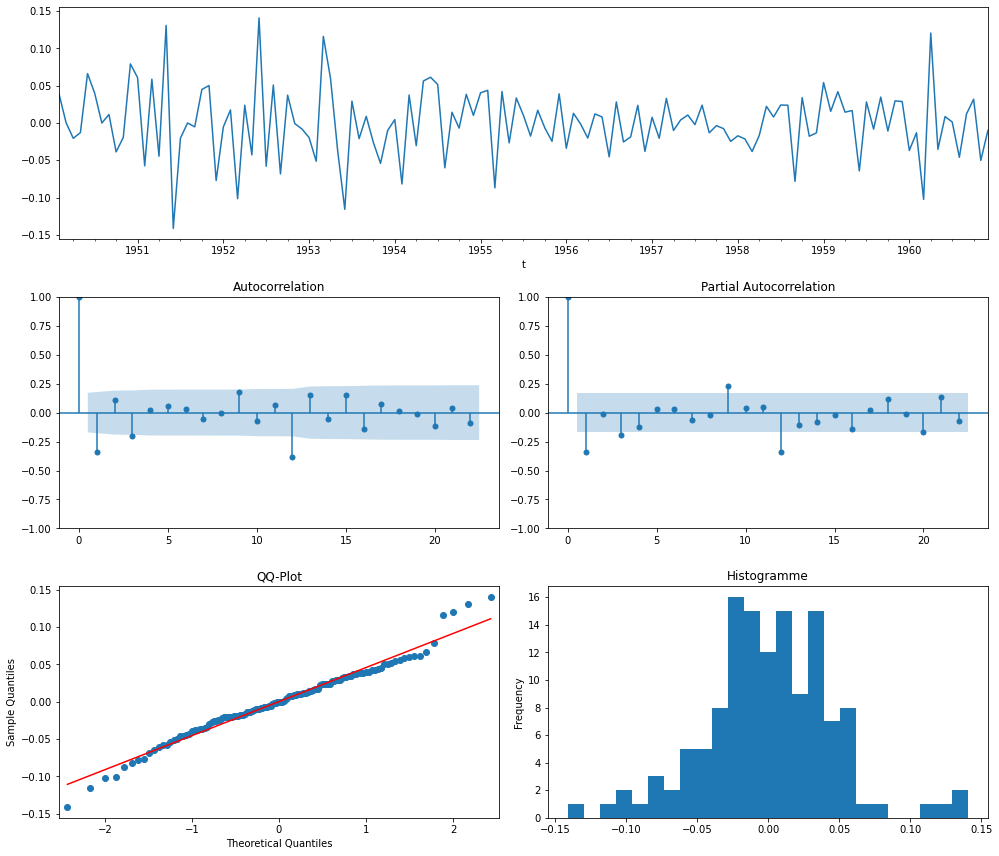

In [24]:
fct.ts_plot(y_diff_1_12[13:].Airpass)

Les graphiques ACF et PACF permettent de voir empiriquement qu'on va avoir un mod√®le $SARIMA(p,d,q)(P,D,Q)_s$ avec $s=12$. On va tester diff√©rents mod√®les.

**Mod√®le 1 :** pour commencer on va prendre un $SARIMA(1,1,1)(1,1,1)_{12}$ qui s'√©crit :
$$(1-\phi_{1}L)(1-\phi'_{1}L^{12})(1-L)(1-L^{12})ln(X_{t})=(1+\theta_{1}L)(1+\theta'_{1}L^{12})\epsilon_{t} $$

In [28]:
from statsmodels.tsa.statespace.sarimax import *

m1 = SARIMAX(y.values, order=(1,1,1), seasonal_order=(1,1,1,12))
res1 = m1.fit(disp=False)
print(res1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 245.152
Date:                            Wed, 29 Jun 2022   AIC                           -480.304
Time:                                    10:41:40   BIC                           -465.928
Sample:                                         0   HQIC                          -474.462
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1701      0.212      0.801      0.423      -0.246       0.586
ma.L1         -0.5649      0.184   

Ce mod√®le a des coefficients non significatifs, on en teste un second en retirant dans le param√®tre associ√© √† la plus grande p-value : ici c'est le terme autor√©gressif saisonnier.

**Mod√®le 2 :** on va donc prendre un $SARIMA(1,1,1)(0,1,1)_{12}$ qui s'√©crit :
$$(1-\phi_{1}L)(1-L)(1-L^{12})ln(X_{t})=(1+\theta_{1}L)(1+\theta'_{1}L^{12})\epsilon_{t} $$

In [29]:
m2 = SARIMAX(y.values, order=(1,1,1), seasonal_order=(0,1,1,12))
res2 = m2.fit(disp=False)
print(res2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.945
Date:                            Wed, 29 Jun 2022   AIC                           -481.890
Time:                                    10:41:57   BIC                           -470.389
Sample:                                         0   HQIC                          -477.217
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1841      0.201      0.915      0.360      -0.210       0.578
ma.L1         -0.5667      0.174   

Ce mod√®le a toujours un coefficient non significatif, on en teste un 3√®me mod√®le en retirant dans le terme autor√©gressif d'ordre 1.

**Mod√®le 3 :** on va donc prendre un $SARIMA(0,1,1)(0,1,1)_{12}$ qui s'√©crit :
$$(1-L)(1-L^{12})ln(X_{t})=(1+\theta_{1}L)(1+\theta'_{1}L^{12})\epsilon_{t} $$

In [30]:
m3 = SARIMAX(y.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res3 = m3.fit(disp=False)
print(res3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Wed, 29 Jun 2022   AIC                           -483.393
Time:                                    10:42:34   BIC                           -474.767
Sample:                                         0   HQIC                          -479.888
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4013      0.073     -5.496      0.000      -0.544      -0.258
ma.S.L12      -0.5566      0.096   

Cette fois tous les coefficients sont significatifs, il faut encore tester ce qu'on appelle la "blancheur" des r√©sidus : on veut avoir des r√©sidus qui sont un bruit blanc (faible), c'est-√†-dire, entre autres qu'ils sont non corr√©l√©s.  
Pour √ßa on peut utiliser le test de Ljung-Box d'autocorr√©lation des r√©sidus qui est impl√©ment√© dans la fonction `acorr_ljungbox` de `statsmodels.stats.diagnostic` 

In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(lag, acorr_ljungbox(res3.resid, lags=lag, return_df=False)[1].mean()))

Retard : p-value
6 : 0.981720860200859
12 : 0.9083064612785483
18 : 0.6207396507474344
24 : 0.5187361239841579
30 : 0.5161804687133994
36 : 0.560395354197207


Toutes les p-values sont √©lev√©es ce qui signifie qu'on ne peut pas rejeter l'hypoth√®se nulle du test. Or, l'hypoth√®se $H_0$ est qu'il n'y a pas d'autocorr√©lation des r√©sidus, on peut pas la rejeter, donc on est bon !

On peut enfin tester la normalit√© des r√©sidus avec le test de Shapiro-Wilk impl√©ment√© dans la fonction `scipy.stats.shapiro`, l'hypoth√®se nulle √©tant que les √©tant que les observations sont normalement distribu√©es, on souhaite encore une fois une p-value √©lev√©e pour ne pas rejeter $H_0$.

In [36]:
from scipy.stats import shapiro
shapiro(res3.resid[13:])

ShapiroResult(statistic=0.9908484220504761, pvalue=0.547280490398407)

Le test de normalit√© est √©galement valid√© pour ce mod√®le et on peut afficher les r√©sidus pour le visualiser :

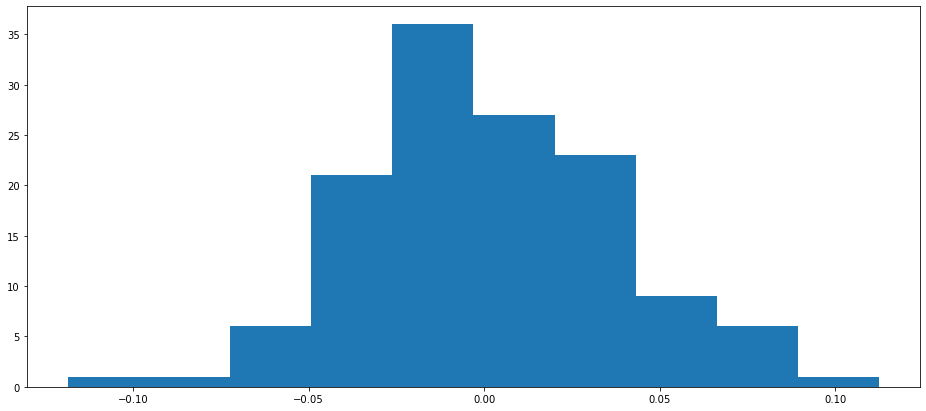

In [37]:
plt.hist(res3.resid[13:], bins=10);

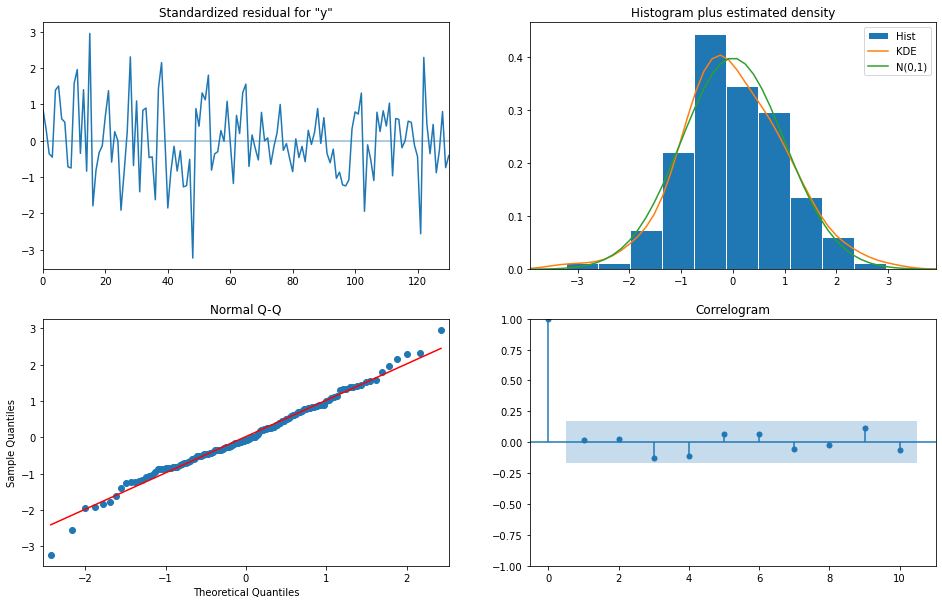

In [38]:
# autre m√©thode d'affichage des r√©sultats
# attention, ce sont les r√©sidus standardis√©s par contre donc pas exactement les m√™mes que ceux affich√©s au dessus.
res3.plot_diagnostics(figsize=(16, 10));

### **5.3. Pr√©vision de l‚Äôann√©e 1961 avec le mod√®le retenu**

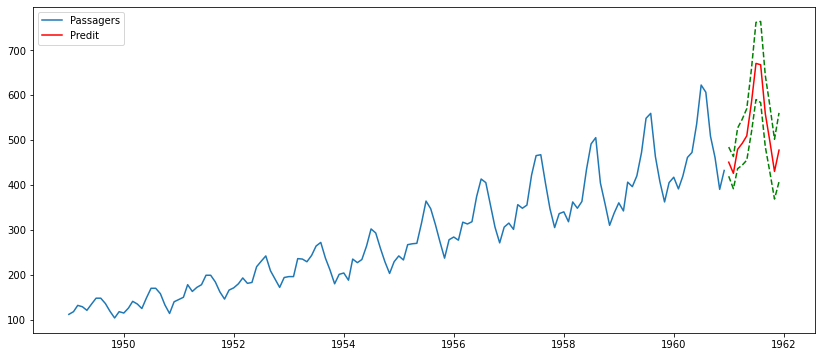

In [39]:
# pr√©diction et intervalles de confiance
y_pred = res3.get_forecast(12)
x_pred = np.exp(y_pred.predicted_mean)
x_pred_inf = [np.exp(p[0]) for p in y_pred.conf_int(alpha=0.05)]
x_pred_sup = [np.exp(p[1]) for p in y_pred.conf_int(alpha=0.05)]

# affichage
plt.figure(figsize=(14,6))
plt.plot(x.index, x.values, label='Passagers')
plt.plot(pd.date_range(x.index[-1], periods=12, freq='M'), x_pred, color='r', label='Predit')
plt.plot(pd.date_range(x.index[-1], periods=12, freq='M'), x_pred_inf, color='g', linestyle='--')
plt.plot(pd.date_range(x.index[-1], periods=12, freq='M'), x_pred_sup, color='g', linestyle='--')
plt.legend()
plt.show()

### **5.4. √âvaluation de la qualit√© pr√©dictive du mod√®le**

On a pas eu vraiment besoin de le faire jusqu'√† maintenant mais, vous le savez, pour pouvoir faire un mod√®le pr√©dictif, il faut mettre en place, entra√Æner, tester et √©valuer votre mod√®le. Pour cela, il faut d√©couper nos donn√©es en training et test sets.

**Exo :** splitter en training et test sets en tronquant la s√©rie en 1959 pour pouvoir ensuite pr√©dire l'ann√©e 1960

In [67]:
# on fait pas un train_test_split mais on tronque la s√©rie car on veut pas des valeurs r√©parties al√©atoirement :
# on veut tous les points jusqu'√† une certaine date pour pr√©dire ceux qui suivent

# s√©rie x : s√©rie des passagers
x_train = x.loc[:'1959', 'Airpass']
x_test = x.loc['1960':, 'Airpass']

# s√©rie y=log(x) : transformation logarithmique de la s√©rie des passagers 
y_train = y.loc[:'1959', 'Airpass']
y_test = y.loc['1960':, 'Airpass']

**Exo :** v√©rifier que le mod√®le retenu pr√©c√©demment est toujours valide sur la s√©rie tronqu√©e "y_train"

In [68]:
# mod√©lisation et summary
model = SARIMAX(y_train.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res = model.fit(disp=False)
print(res.summary())

# test d'autocorr√©lation des r√©sidus
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(lag, acorr_ljungbox(res.resid, lags=lag, return_df=False)[1].mean()))
    
# test de normalit√© des r√©sidus
shapiro(res.resid[13:])

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 223.627
Date:                            Wed, 29 Jun 2022   AIC                           -441.253
Time:                                    11:00:28   BIC                           -432.916
Sample:                                         0   HQIC                          -437.868
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3488      0.081     -4.303      0.000      -0.508      -0.190
ma.S.L12      -0.5621      0.094   

ShapiroResult(statistic=0.9925785064697266, pvalue=0.7792742252349854)

**Exo :** pr√©dire les valeurs des ann√©es 1959 et 1960 et afficher sur un m√™me graphique les valeurs r√©elles, pr√©dites et les intervalles de confiance

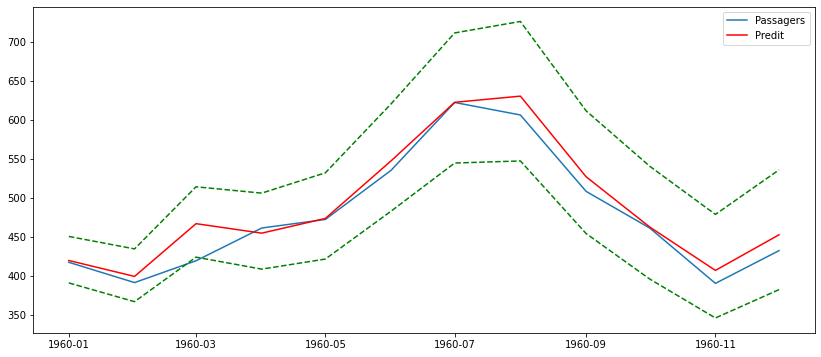

In [69]:
# pr√©diction et intervalles de confiance
y_pred = res.get_forecast(len(y_test))
x_pred = np.exp(y_pred.predicted_mean)
x_pred_inf = [np.exp(p[0]) for p in y_pred.conf_int(alpha=0.05)]
x_pred_sup = [np.exp(p[1]) for p in y_pred.conf_int(alpha=0.05)]

# affichage
plt.figure(figsize=(14,6))
plt.plot(x_test.index, x_test.values, label='Passagers')
plt.plot(x_test.index, x_pred, color='r', label='Predit')
plt.plot(x_test.index, x_pred_inf, color='g', linestyle='--')
plt.plot(x_test.index, x_pred_sup, color='g', linestyle='--')
plt.legend()
plt.show()

**Exo :** calculer les 2 m√©triques RMSE et MAPE pour ces pr√©dictions

In [70]:
rmse = np.sqrt(((x_test-x_pred)**2).mean())
mape = (np.abs(1-x_pred/x_test)).mean()*100
print("RMSE = {} et MAPE = {}".format(rmse, mape))

RMSE = 18.59230984670951 et MAPE = 2.90416326714094


**Exo :** r√©peter les op√©rations du point 5.4 en modifiant la troncature : training set avec les donn√©es jusqu'en 1958 pour pr√©dire un test set avec les ann√©es 1959 et 1960

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 197.505
Date:                            Wed, 29 Jun 2022   AIC                           -389.010
Time:                                    11:01:23   BIC                           -380.991
Sample:                                         0   HQIC                          -385.759
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3422      0.087     -3.921      0.000      -0.513      -0.171
ma.S.L12      -0.5407      0.105   

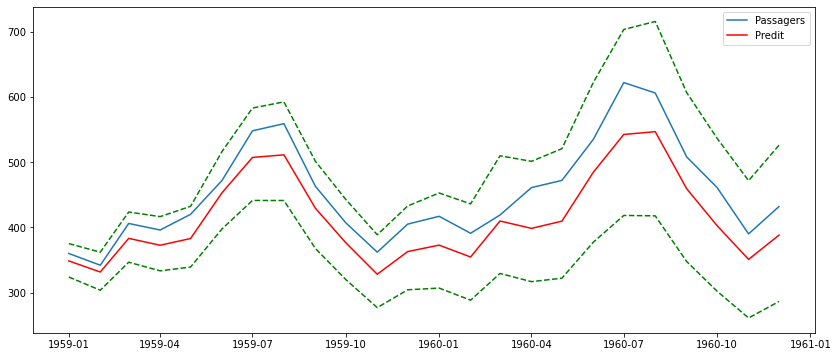

RMSE = 43.18024430485034 et MAPE = 8.51556515346472


In [72]:
x_train = x.loc[:'1958', 'Airpass']
x_test = x.loc['1959':, 'Airpass']
y_train = y.loc[:'1958', 'Airpass']
y_test = y.loc['1959':, 'Airpass']

# mod√©lisation et summary
model = SARIMAX(y_train.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res = model.fit(disp=False)
print(res.summary())

# test d'autocorr√©lation des r√©sidus
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(lag, acorr_ljungbox(res.resid, lags=lag, return_df=False)[1].mean()))
    
# test de normalit√© des r√©sidus
print(shapiro(res.resid[13:]))

# pr√©diction et intervalles de confiance
y_pred = res.get_forecast(len(y_test))
x_pred = np.exp(y_pred.predicted_mean)
x_pred_inf = [np.exp(p[0]) for p in y_pred.conf_int(alpha=0.05)]
x_pred_sup = [np.exp(p[1]) for p in y_pred.conf_int(alpha=0.05)]

# affichage
plt.figure(figsize=(14,6))
plt.plot(x_test.index, x_test.values, label='Passagers')
plt.plot(x_test.index, x_pred, color='r', label='Predit')
plt.plot(x_test.index, x_pred_inf, color='g', linestyle='--')
plt.plot(x_test.index, x_pred_sup, color='g', linestyle='--')
plt.legend()
plt.show()

# √©valuation de la qualit√© de pr√©diction
rmse = np.sqrt(((x_test-x_pred)**2).mean())
mape = (np.abs(1-x_pred/x_test)).mean()*100
print("RMSE = {} et MAPE = {}".format(rmse, mape))

### **5.5. Une autre approche pour la d√©termination du mod√®le**

Pour adapter les donn√©es de s√©rie temporelles √† un mod√®le ARIMA saisonnier avec les param√®tres $SARIMA(p,d,q)(P,D,Q)s$, on doit trouver les param√®tres optimaux et pour √ßa on peut aussi faire de la recherche sur grille qui consiste √† tester de mani√®re it√©rative plusieurs valeurs possibles des param√®tres et d'√©valuer les mod√®les en utilisant des crit√®res comme le crit√®re AIC ou BIC.

On utilisera nous le crit√®re d'information Akaike ($AIC$) qui mesure la qualit√© relative des mod√®les statistiques pour un ensemble d'observations donn√©. √Ä partir d'un ensemble de mod√®les, le crit√®re $AIC$ permet d'estime la qualit√© de chacun des mod√®le par rapport aux autres mod√®les. Cela permet donc de s√©lectionner des mod√®les. Intuitivement, le crit√®re $AIC$ mesure le compromis entre la qualit√© de l'ajustement du mod√®le aux observations fournies et la complexit√© du mod√®le (nombre de param√®tres inclus et estim√©s). Le crit√®re $AIC$ est calcul√© par :

$AIC=2k-2ln(L)$ avec :
- $k$ nombre de param√®tres estim√©s
- $L$ valeur maximale de la vraisemblance (pour simplifier maximiser la vraisemblance revient plus ou moins √† minimiser l'erreur)

Le meilleur mod√®le est celui qui minimise le crit√®re $AIC$.

**Exo :** on continue √† mod√©liser la s√©rie logarithmique. Tronquer la s√©rie en 1958 (inclus) pour pr√©dire 1959 et 1960

In [81]:
x_train = x.loc[:'1958', 'Airpass']
x_test = x.loc['1959':, 'Airpass']
y_train = y.loc[:'1958', 'Airpass']
y_test = y.loc['1959':, 'Airpass']

**Exo :** g√©n√©rer les valeurs possibles des param√®tres que nous aimerions √©valuer, √† savoir $(p,d,q)(P,D,Q)$ puisque $s$ sera √©gal √† 12 on le sait. On testera toutes les valeurs entre 0 et 2 pour chacun des 6 param√®tres c'est-√†-dire $3^6 = 729$ possibilit√©s, c'est long...

In [82]:
# on d√©finit les valeurs possibles pour les param√®tres
p = d = q = P = D = Q = range(3)

# on g√©n√®re toutes les combinaisons possibles
import itertools
params = list(itertools.product(p, d, q, P, D, Q))
print(len(params), params[0:10])

729 [(0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 2), (0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 1, 2), (0, 0, 0, 0, 2, 0), (0, 0, 0, 0, 2, 1), (0, 0, 0, 0, 2, 2), (0, 0, 0, 1, 0, 0)]


**Exo :** boucler sur toutes les combinaisons possibles de param√®tres et calculer le crit√®re AIC pour d√©terminer le meilleur mod√®le parmi ceux test√©s (la valeur du crit√®re AIC d'un mod√®le est facilement r√©cup√©rable...)

```python
from statsmodels.tsa.statespace.sarimax import *
import sys

import warnings
warnings.filterwarnings(action='ignore') #'once' pour afficher le warning une seule fois

# pour affichage d'une barre de progression
from ipywidgets import IntProgress
from IPython.display import display
progressbar = IntProgress(min=0, max=729) # instancie la barre de progression
display(progressbar) # affiche la barre

best_aic = np.inf
best_pdq = None
best_PDQ = None
tmp_model = None
best_model = None

for p,d,q,P,D,Q in params:
    try:
        tmp_model = SARIMAX(y_train,
                            order = (p,d,q),
                            seasonal_order = (P,D,Q,12),
                            enforce_stationarity=True,
                            enforce_invertibility=True)
        res = tmp_model.fit()
        
        progressbar.value += 1 #signal pour augmenter la barre de progression

        if res.aic < best_aic:
            best_aic = res.aic
            best_pdq = (p,d,q)
            best_PDQ = (P,D,Q)
            best_model = tmp_model
    except:
        #print("Erreur:", sys.exc_info()[1])
        continue
            
print("Mod√®le retenu : SARIMA{}{}12 - AIC:{}".format(best_pdq, best_PDQ, best_aic))
```

Le code ci-dessus permet de tester toutes les valeurs des param√®tres et on obtient comme mod√®le optimal (c'est un peu long).  
output : Mod√®le retenu : SARIMA(0, 1, 1)(1, 0, 1)12 - AIC:-405.4220183264598

Les mod√®les retenus pour les diff√©rentes s√©ries sont :
- pour la s√©rie originale tronqu√©e `x_train`: $SARIMA(1, 1, 0)(0, 2, 2)12 / AIC:727.0352304108962$
- pour la s√©rie logarithmique tronqu√©e `y_train`: $SARIMA(0, 1, 1)(1, 0, 1)12 / AIC:-405.4220183264598$
- pour la s√©rie originale compl√®te `x`: $SARIMA(0, 1, 1)(0, 2, 2)12 / AIC:938.046448335865$
- pour la s√©rie logarithmique compl√®te `y`: $SARIMA(0, 1, 1)(2, 0, 2)12 / AIC:-499.9919796568762$

**Exo :**
- entrainer le mod√®le retenu
- calculer l'AIC
- afficher le summary pour notamment v√©rifier les p-values des coefficients
- regarder les r√©sidus

/home/elka/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/elka/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


-405.4220890824692
                                     SARIMAX Results                                      
Dep. Variable:                            Airpass   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 206.711
Date:                            Wed, 29 Jun 2022   AIC                           -405.422
Time:                                    11:09:17   BIC                           -394.306
Sample:                                01-01-1949   HQIC                          -400.908
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2909      0.082     -3.544      0.000      -0.452      -0.130
ar.S.L12       0

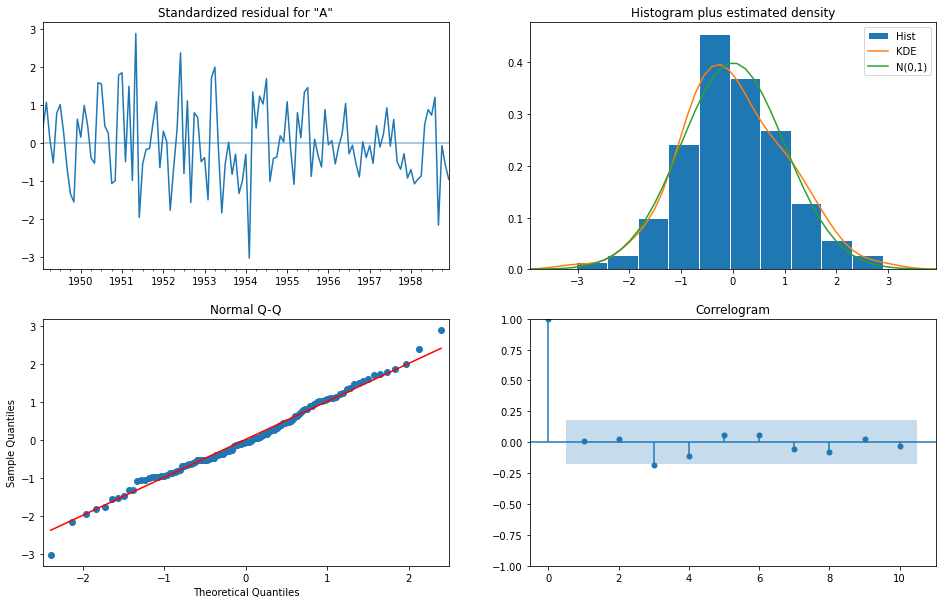

In [83]:
# mod√®le retenu
res = SARIMAX(y_train, order=(0,1,1), seasonal_order=(1,0,1,12)).fit(disp=False)

# summary
print(res.aic)
print(res.summary())

# r√©sidus
res.plot_diagnostics(figsize=(16, 10));
print("Test de Shapiro :", shapiro(res.resid[13:]))

**Exo :** pr√©dire √† partir du mod√®le retenu les 2 ann√©es 1959 et 1960 et afficher sur un m√™me graphique la s√©rie originale, les pr√©dictions et l'intervalle de confiance.

<Figure size 1368x504 with 0 Axes>

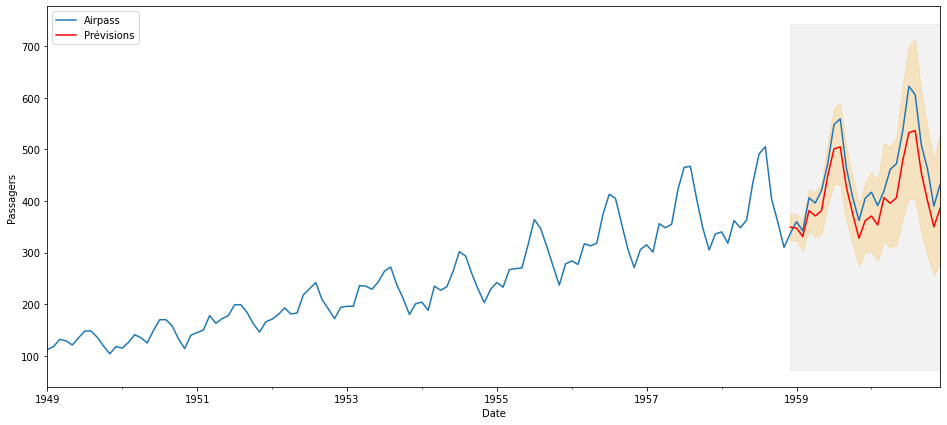

In [84]:
# pr√©diction et intervalles de confiance
y_pred = res.get_prediction(start=pd.to_datetime('1958-12-01'), end=pd.to_datetime('1960-12-01'))
x_pred = np.exp(y_pred.predicted_mean)
pred_CI = np.exp(y_pred.conf_int())

# affichage
fig = plt.figure(figsize=(19, 7))
ax = x['1949':].plot(label='S√©rie observ√©e');
x_pred.plot(ax=ax, label='Pr√©visions', color='red');

# affichage de l'intervalle de confiance
ax.fill_between(pred_CI.index, 
                pred_CI.iloc[:, 0], 
                pred_CI.iloc[:, 1], color='orange', alpha=.2);

# un peu de style
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-12-01'), x.index[-1], alpha=.1, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel('Passagers');
plt.legend(loc='upper left');
plt.show()

**Exo :** √©valuer la qualit√© pr√©dictive du mod√®le via RMSE et MAPE.

In [85]:
rmse = np.sqrt(((x_test-x_pred)**2).mean())
mape = (np.abs(1-x_pred/x_test)).mean()*100
print("RMSE = {} et MAPE = {}".format(rmse, mape))

RMSE = 47.11786986382568 et MAPE = 9.220540274482797


**Exo :** faire une pr√©vision √† long terme  
√Ä l'aide d'un processus ARIMA saisonnier bas√© sur toute la s√©rie temporelle (on mod√©lise toujours la s√©rie logarithmique), pr√©dire les 10 ann√©es suivantes : d√©terminer les param√®tres du mod√®le optimal par recherche sur grille.  
Afficher les graphiques qui vous paraissent utiles et int√©ressants.

```python
from statsmodels.tsa.statespace.sarimax import *
import sys
import itertools
from ipywidgets import IntProgress
from IPython.display import display
import warnings
warnings.filterwarnings(action='ignore')

# valeurs possibles des param√®tres
max_param = 3
p = d = q = P = D = Q = range(max_param)

# barre de progression
progressbar = IntProgress(min=0, max=max_param**6)
display(progressbar)

best_aic = np.inf
best_pdq = None
best_PDQ = None
tmp_model = None
best_model = None

for p,d,q,P,D,Q in itertools.product(p, d, q, P, D, Q):
    try:
        tmp_model = SARIMAX(y,
                            order = (p,d,q),
                            seasonal_order = (P,D,Q,12),
                            enforce_stationarity=True,
                            enforce_invertibility=True)
        res = tmp_model.fit()
        
        progressbar.value += 1 #signal pour augmenter la barre de progression

        if res.aic < best_aic:
            best_aic = res.aic
            best_pdq = (p,d,q)
            best_PDQ = (P,D,Q)
            best_model = tmp_model
    except:
        #print("Erreur:", sys.exc_info()[1])
        continue
            
print("Mod√®le retenu : SARIMA{}{}12 - AIC:{}".format(best_pdq, best_PDQ, best_aic))
```

/home/elka/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/elka/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


-499.31610812523667
                                     SARIMAX Results                                      
Dep. Variable:                            Airpass   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 253.658
Date:                            Wed, 29 Jun 2022   AIC                           -499.316
Time:                                    11:11:03   BIC                           -487.465
Sample:                                01-01-1949   HQIC                          -494.500
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3554      0.070     -5.069      0.000      -0.493      -0.218
ar.S.L12       

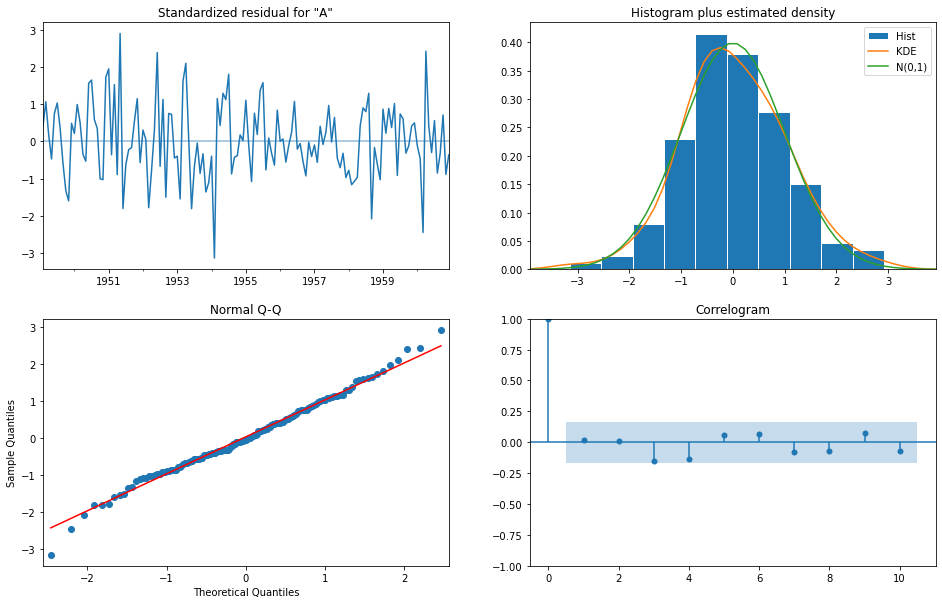

In [86]:
# mod√®le retenu
res = SARIMAX(y, order=(0,1,1), seasonal_order=(1,0,1,12)).fit(disp=False)

# summary
print(res.aic)
print(res.summary())

# r√©sidus
res.plot_diagnostics(figsize=(16, 10));
print("Test de Shapiro :", shapiro(res.resid[13:]))

# pr√©diction et intervalles de confiance
y_pred = res.get_forecast(steps=120)
x_pred = np.exp(y_pred.predicted_mean)
pred_CI = np.exp(y_pred.conf_int(alpha=0.05))

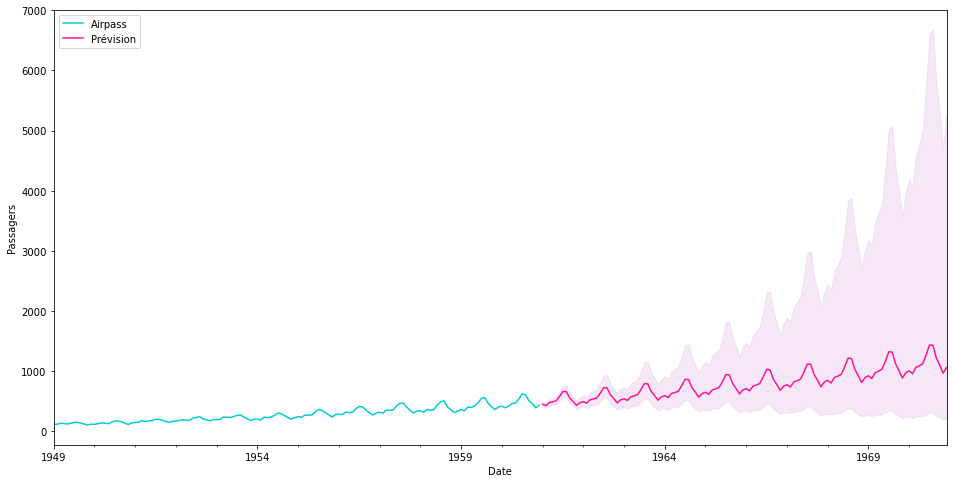

In [87]:
# affichage
ax = x.plot(label='Observ√©s', figsize=(16, 8), color='darkturquoise');
x_pred.plot(ax=ax, label='Pr√©vision', color='deeppink')
ax.fill_between(pred_CI.index,
                pred_CI.iloc[:, 0],
                pred_CI.iloc[:, 1], color='plum', alpha=.25);
ax.set_xlabel('Date');
ax.set_ylabel('Passagers');
plt.legend(loc='upper left')
plt.show()

/home/elka/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/elka/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/elka/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                              Airpass   No. Observations:                  144
Model:             SARIMAX(2, 1, 3)x(1, 2, [1], 12)   Log Likelihood                -461.981
Date:                              Wed, 29 Jun 2022   AIC                            939.961
Time:                                      11:12:00   BIC                            962.194
Sample:                                  01-01-1949   HQIC                           948.990
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0374      0.125      0.298      0.765      -0.208       0.283
ar.L2         -0.79

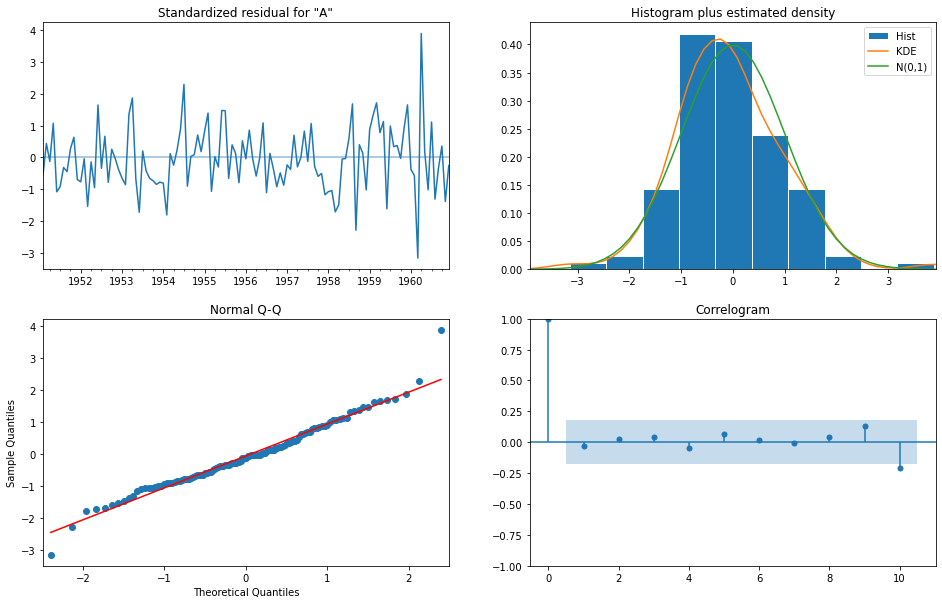

In [88]:
# mod√®le retenu
res = SARIMAX(x, order=(2,1,3), seasonal_order=(1,2,1,12)).fit(disp=False)

# summary
print(res.summary())

# r√©sidus
res.plot_diagnostics(figsize=(16, 10));
print("Test de Shapiro :", shapiro(res.resid[13:]))

# pr√©diction et intervalles de confiance
x_pred = res.get_forecast(steps=120)
pred_CI = x_pred.conf_int(alpha=0.05)

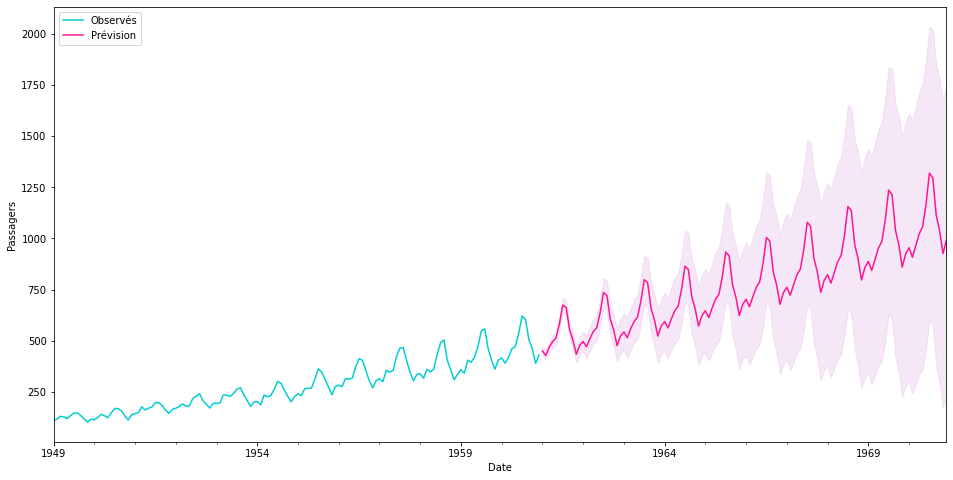

In [58]:
# affichage
ax = x.plot(label='Observ√©s', figsize=(16, 8), color='darkturquoise');
x_pred.predicted_mean.plot(ax=ax, label='Pr√©vision', color='deeppink')
ax.fill_between(pred_CI.index,
                pred_CI.iloc[:, 0],
                pred_CI.iloc[:, 1], color='plum', alpha=.25);
ax.set_xlabel('Date');
ax.set_ylabel('Passagers');
plt.legend(loc='upper left')
plt.show()